# Logistic Regression

## Introduction 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

## Loading Datasets

In [53]:
TRAIN_SET = './datasets/train_catvnoncat.h5'
TEST_SET = './datasets/test_catvnoncat.h5'

train_h5 = h5py.File(TRAIN_SET, 'r')
test_h5 = h5py.File(TEST_SET, 'r')

print("Training Group Keys: ", train_h5.keys())
print("Test Group Keys: ", train_h5.keys())

Training Group Keys:  <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
Test Group Keys:  <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [54]:
train_set_x = train_h5['train_set_x'].value
train_set_y = train_h5['train_set_y'].value


test_set_x = test_h5['test_set_x'].value
test_set_y = test_h5['test_set_y'].value

classes = train_h5['list_classes'].value

train_h5.close()
test_h5.close()

/home/deepanshu/anaconda3/envs/dl/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [55]:
# Reshaping y of test and train
train_set_y.resize((train_set_y.shape[0],1))
test_set_y.resize((test_set_y.shape[0],1))

train_set_y = train_set_y.T
test_set_y = test_set_y.T

(1, 209)

## Visualizing Dataset

In [56]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]

num_px = train_set_x.shape[1]

print ("Number of training examples: m_train = ", str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train =  209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


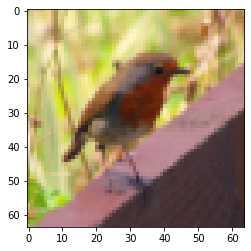

In [45]:
plt.imshow(train_set_x[10])

## Flatten Dataset

In [57]:
train_set_x_flatten = train_set_x.reshape(m_train, -1).T
test_set_x_flatten = test_set_x.reshape(m_test, -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [58]:
train_x = train_set_x_flatten/255.
test_x = test_set_x_flatten/255.